In [1]:
import matplotlib.pyplot as plt #data visualization
import numpy as np #numerical manipulation of the datasets
import pandas as pd #reading in our data
from sklearn.ensemble import RandomForestRegressor  #importing our model
from sklearn.linear_model import LinearRegression  #importing our model
from sklearn.metrics import mean_squared_error  #importing our metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score  #validation andchecking for fittings
import seaborn as sns  #customizing the visualizations

#deployment module
import streamlit as st

#saving our model
import pickle
import joblib
from joblib import dump

In [ ]:
#our data is divided into train set and test set. We read them individually
#For the train data we first determine the number of rows
with open("I:/DATA SCIENCE/train.csv") as file:
    n_rows = len(file.readlines())
    print('Exact no. of rows', format(n_rows))

In [ ]:
#with the high number of rows we may want to chunk our data to avoid crushing our machine
#we chunk to get 50 rowschunk_size = 50000
batch_no = 1
for chunk in pd.read(train.csv, chunk_size = chunk_size):
    chunk.to_csv('movie_rating' + 'str(batch_no)' + '.csv', index = False)
    batch_no +=1

In [2]:
#reading in our data
trn = pd.read_csv('movie_rating1.csv')
trn.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [3]:
#determining the number of unique key numbers from the train data
trn.key.nunique()

50000

In [4]:
trn.columns  #to display the columns in our dataset

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [5]:
trn.shape    #to display the number of observations and their features 

(50000, 8)

In [6]:
#reading in our test data
tst = pd.read_csv('test1.csv')
tst.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1


In [7]:
#the number of unique key numbers from the test data
tst.key.nunique()

100

In [8]:
tst.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,-73.976663,40.749884,-73.978484,40.748806,1.0
std,0.034617,0.026221,0.029571,0.026083,0.0
min,-74.014099,40.644790,-74.015665,40.640400,1.0
25%,-73.992888,40.738724,-73.992647,40.735169,1.0
50%,-73.982292,40.750549,-73.983530,40.750298,1.0
75%,-73.969865,40.767329,-73.972122,40.764818,1.0
max,-73.777282,40.800890,-73.741922,40.808220,1.0


In [9]:
tst.columns  #to determine the number the columns present in the dataset

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

The train and the test data sets exist as separate entities. We wish to combine the two datasets and since the number of unique keys numbers are not the same, we use the concatenate function.

In [10]:
df1 = trn  
df2 = tst
df = pd.concat([df1, df2])
df.columns  #to determine the resultant number of columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [11]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50100.000000,50100.000000,50100.000000,50100.000000,50100.000000
mean,11.364171,-72.512684,39.935388,-72.507558,39.927893,1.666507
std,9.685557,10.383688,6.218748,10.397386,6.008843,1.288252
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992065,40.734887,-73.991156,40.734374,1.000000
50%,8.500000,-73.981840,40.752675,-73.980092,40.753365,1.000000
75%,12.500000,-73.967159,40.767360,-73.963598,40.768162,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [13]:
df.info()   #will help me identify the missing values and the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50100 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50100 non-null  object 
 3   pickup_longitude   50100 non-null  float64
 4   pickup_latitude    50100 non-null  float64
 5   dropoff_longitude  50100 non-null  float64
 6   dropoff_latitude   50100 non-null  float64
 7   passenger_count    50100 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


Text(0.5, 1.0, 'The distribution of the missing data')

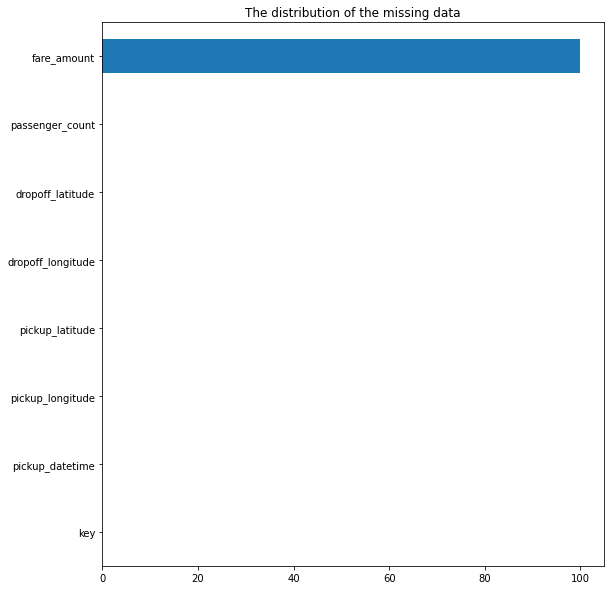

In [14]:
#since after combining, the fare_amount had 100 missing data
#we plot a bar graph to see the distribution of the missing data
df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9,10))
plt.title("The distribution of the missing data")

In [15]:
#handling categorical data
cat_cols = list()
num_cols = list()
for col in df.columns:
    if df[col].nunique() < 10:
        cat_cols.append(col)
    else:
        num_cols.append(col)
cat_cols

['passenger_count']

In [16]:
def frequency_encoder(df, col):
    fe = df.groupby(col).size()/len(df)
    df[col+'_encoded'] = df[col].map(fe)
    return df
new_train = frequency_encoder(df, 'passenger_count')
new_train.head(2)

2021-10-13 23:08:23.434 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,passenger_count_encoded
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.696766
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.696766


In [17]:
new_train = new_train.drop(columns = ['passenger_count'])
new_train.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_encoded
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.696766
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,0.696766


In [18]:
#handling numerical data using the interpolate function
train_df = new_train.interpolate(method = "linear", limit_direction = "forward")
train_df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_encoded
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.696766
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,0.696766


Text(0.5, 1.0, 'The distribution of the missing data')

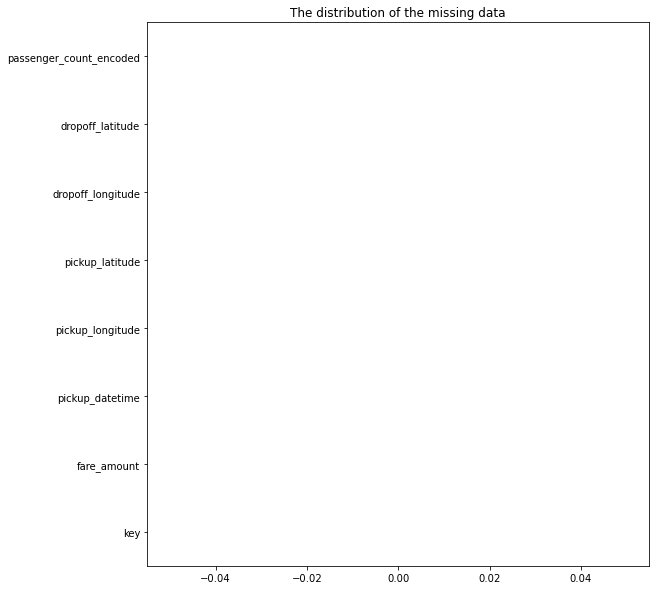

In [19]:
#visualizing the distribution of the data after filling in the missing data
train_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9,10))
plt.title("The distribution of the missing data")

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key                      50100 non-null  object 
 1   fare_amount              50100 non-null  float64
 2   pickup_datetime          50100 non-null  object 
 3   pickup_longitude         50100 non-null  float64
 4   pickup_latitude          50100 non-null  float64
 5   dropoff_longitude        50100 non-null  float64
 6   dropoff_latitude         50100 non-null  float64
 7   passenger_count_encoded  50100 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.4+ MB


In [21]:
#handling datetime
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_encoded
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,0.696766
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,0.696766


In [22]:
train_df['Year'] = train_df['pickup_datetime'].dt.year
train_df['Month'] = train_df['pickup_datetime'].dt.month
train_df['Day'] = train_df['pickup_datetime'].dt.day
train_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count_encoded', 'Year', 'Month', 'Day'],
      dtype='object')

In [23]:
train_df = train_df.drop(columns = ['pickup_datetime'])
train_df.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count_encoded',
       'Year', 'Month', 'Day'],
      dtype='object')

Text(0.5, 1.0, 'value count for fare_amount')

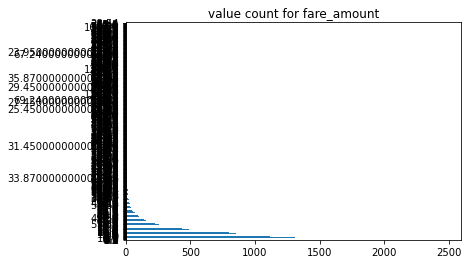

In [24]:
#visualization of our target variable
fare_amount_count = train_df['fare_amount'].value_counts()
fare_amount_count.plot(kind = 'barh')
plt.title("value count for fare_amount")

Text(0.5, 1.0, 'histogram for the fare amount')

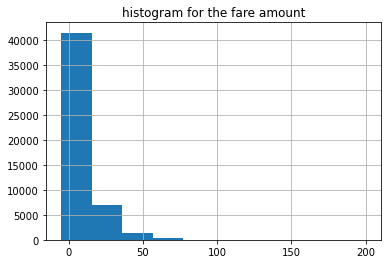

In [25]:
train_df['fare_amount'].hist()
plt.title("histogram for the fare amount")

# #scaling the target variable to remove otliers
# $x_{scaled} = x - x_{min}/x_{max} - x_{min}$

In [26]:
new_fare_amount = train_df['fare_amount']
np.min(new_fare_amount), np.max(new_fare_amount)

(-5.0, 200.0)

In [27]:
def min_max_scaler(col):
    scaled_result = (col -np.min(col))/(np.max(col) - np.min(col))
    return scaled_result

scaled_new_fare_amount = min_max_scaler(new_fare_amount)
np.min(scaled_new_fare_amount), np.max(scaled_new_fare_amount)

(0.0, 1.0)

In [28]:
#to find the correlation of our features
corr_matrix = train_df.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_encoded,Year,Month,Day
fare_amount,1.000000,0.005957,-0.007351,0.004299,-0.005455,-0.022517,0.120577,0.026870,-0.001442
pickup_longitude,0.005957,1.000000,-0.950589,0.956133,-0.946970,0.007689,-0.001567,0.000421,0.006053
pickup_latitude,-0.007351,-0.950589,1.000000,-0.911126,0.928192,-0.005773,-0.001068,0.000706,-0.006705
dropoff_longitude,0.004299,0.956133,-0.911126,1.000000,-0.982118,0.007908,-0.000535,0.001411,0.005187
dropoff_latitude,-0.005455,-0.946970,0.928192,-0.982118,1.000000,-0.006715,-0.001611,-0.000426,-0.007978
passenger_count_encoded,-0.022517,0.007689,-0.005773,0.007908,-0.006715,1.000000,0.018836,-0.011072,-0.005189
Year,0.120577,-0.001567,-0.001068,-0.000535,-0.001611,0.018836,1.000000,-0.115879,-0.011368
Month,0.026870,0.000421,0.000706,0.001411,-0.000426,-0.011072,-0.115879,1.000000,-0.017640
Day,-0.001442,0.006053,-0.006705,0.005187,-0.007978,-0.005189,-0.011368,-0.017640,1.000000


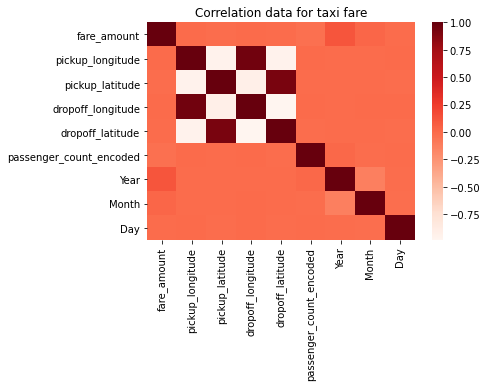

In [29]:
sns.heatmap(corr_matrix, cmap = plt.cm.Reds)
plt.title('Correlation data for taxi fare')
plt.show()

In [30]:
#determining the featurest hat most correlate with our target variable
target =abs(corr_matrix['fare_amount'])
sig_features = target[target > 0.004]
sig_features

fare_amount                1.000000
pickup_longitude           0.005957
pickup_latitude            0.007351
dropoff_longitude          0.004299
dropoff_latitude           0.005455
passenger_count_encoded    0.022517
Year                       0.120577
Month                      0.026870
Name: fare_amount, dtype: float64

In [31]:
train_df.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count_encoded',
       'Year', 'Month', 'Day'],
      dtype='object')

In [32]:
y = train_df['fare_amount']
x = train_df.drop(columns = ['key', 'fare_amount', 'Day' ], axis = 1)

In [33]:
SEED = 2020

In [34]:
models = list()
models.append(("Linear Regression", LinearRegression()))
models.append(("RandomForest Regressor", RandomForestRegressor()))
results = list()
names = list()
scoring = "neg_mean_squared_error"

In [35]:
for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = -(cross_val_score(model, x, y, cv = kfold, scoring = scoring))
    results.append(cv_results)
    error_score = "%s:%f (%f)" %(model, cv_results.mean(), cv_results.std())
    print(error_score)

LinearRegression():92.076020 (5.559184)
RandomForestRegressor():22.756410 (4.220701)


In [36]:
#since the randomforestregressor has a better performance, we choose it
model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [37]:
#finding the mean squared error
mse = mean_squared_error(predictions, y_test)
mse

20.675711138826298

In [38]:
#saving our model for deployment
pickle.dump(RandomForestRegressor(), open("Taxi Fare Prediction.pkl", "wb"))
dump(RandomForestRegressor(), "Taxi Fare Prediction.joblib")

['Taxi Fare Prediction.joblib']